In [1]:
import pandas as pd

import pytelligence as pt

%load_ext autoreload
%autoreload 2

pd.options.display.max_columns = 2000

/home/george/Desktop/pytelligence/.venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Created directory for logs at '/home/george/Desktop/pytelligence/demo/logs'


In [4]:
df = pd.read_csv("./mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [7]:
replace_dict = {
    "class": {"p": "poisonous", "e": "edible"},
    "cap-shape": {
        "b": "bell",
        "c": "conical",
        "x": "convex",
        "f": "flat",
        "k": "knobbed",
        "s": "sunken",
    },
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaley", "s": "smooth"},
    "cap-color": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "r": "green",
        "p": "pink",
        "u": "purple",
        "e": "red",
        "w": "white",
        "y": "yellow",
    },
    "bruises": {"t": True, "f": False},
    "odor": {
        "a": "almond",
        "l": "anise",
        "c": "creosote",
        "y": "fishy",
        "f": "foul",
        "m": "musty",
        "n": "odorless",
        "p": "pungent",
        "s": "spicy",
    },
    "gill-attachment": {
        "a": "attached",
        "d": "descending",
        "f": "free",
        "n": "notched",
    },
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {
        "k": "black",
        "n": "brown",
        "b": "buff",
        "h": "chocolate",
        "g": "gray",
        "r": "green",
        "o": "orange",
        "p": "pink",
        "u": "purple",
        "e": "red",
        "w": "white",
        "y": "yellow",
    },
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {
        "b": "bulbous",
        "c": "club",
        "u": "cup",
        "e": "equal",
        "z": "rhizomorphs",
        "r": "rooted",
        "?": "missing",
    },
    "stalk-surface-above-ring": {
        "f": "fibrous",
        "y": "scaley",
        "k": "silky",
        "s": "smooth",
    },
    "stalk-surface-below-ring": {
        "f": "fibrous",
        "y": "scaley",
        "k": "silky",
        "s": "smooth",
    },
    "stalk-color-above-ring": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "o": "orange",
        "p": "pink",
        "e": "red",
        "w": "white",
        "y": "yellow",
    },
    "stalk-color-below-ring": {
        "n": "brown",
        "b": "buff",
        "c": "cinnamon",
        "g": "gray",
        "o": "orange",
        "p": "pink",
        "e": "red",
        "w": "white",
        "y": "yellow",
    },
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": 0, "o": 1, "t": 2},
    "ring-type": {
        "c": "cobwebby",
        "e": "evanescent",
        "f": "flaring",
        "l": "large",
        "n": "none",
        "p": "pendant",
        "s": "sheathing",
        "z": "zone",
    },
    "spore-print-color": {
        "k": "black",
        "b": "buff",
        "h": "chocolate",
        "r": "green",
        "u": "purple",
        "n": "brown",
        "o": "orange",
        "w": "white",
        "y": "yellow",
    },
    "population": {
        "a": "abundant",
        "c": "clustered",
        "n": "numerous",
        "s": "scattered",
        "v": "several",
        "y": "solitary",
    },
    "habitat": {
        "g": "grasses",
        "l": "leaves",
        "m": "meadows",
        "p": "paths",
        "u": "urban",
        "w": "waste",
        "d": "woods",
    },
}
df1 = df.copy()
for column in replace_dict.keys():
    for key, value in replace_dict[column].items():
        df1[column] = df1[column].replace(key, value)

df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,True,pungent,free,close,narrow,black,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,True,almond,free,close,broad,black,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,True,anise,free,close,broad,brown,enlarging,club,smooth,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,poisonous,convex,scaley,white,True,pungent,free,close,narrow,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,edible,convex,smooth,gray,False,odorless,free,crowded,broad,black,tapering,equal,smooth,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   bool  
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
setup, X_sample, y_sample = pt.modelling.prepare_data(
    train_data=df1, config_path="./mushrooms.yml"
)
X_sample.head()

[I 2022-12-14 11:54:22] %%% PREPARING DATA
[I 2022-12-14 11:54:22] Read ./mushrooms.yml: 
 {'modelling': {'target_clf': 'class', 'numeric_cols': ['ring-number'], 'categorical_cols': ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat'], 'feature_scaling': True}}
[I 2022-12-14 11:54:22] Created preprocessing pipeline with following steps: ['scaler', 'ohe']
/home/george/Desktop/pytelligence/pytelligence/modelling/_internals/_prep_pipeline.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,ring-number,cap-shape_bell,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_fibrous,cap-surface_grooves,cap-surface_scaley,cap-surface_smooth,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,odor_almond,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_odorless,odor_pungent,odor_spicy,gill-attachment_attached,gill-attachment_free,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_black,gill-color_brown,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow,stalk-shape_enlarging,stalk-shape_tapering,stalk-root_bulbous,stalk-root_club,stalk-root_equal,stalk-root_missing,stalk-root_rooted,stalk-surface-above-ring_fibrous,stalk-surface-above-ring_scaley,stalk-surface-above-ring_silky,stalk-surface-above-ring_smooth,stalk-surface-below-ring_fibrous,stalk-surface-below-ring_scaley,stalk-surface-below-ring_silky,stalk-surface-below-ring_smooth,stalk-color-above-ring_brown,stalk-color-above-ring_buff,stalk-color-above-ring_cinnamon,stalk-color-above-ring_gray,stalk-color-above-ring_orange,stalk-color-above-ring_pink,stalk-color-above-ring_red,stalk-color-above-ring_white,stalk-color-above-ring_yellow,stalk-color-below-ring_brown,stalk-color-below-ring_buff,stalk-color-below-ring_cinnamon,stalk-color-below-ring_gray,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-type_partial,veil-color_brown,veil-color_orange,veil-color_white,veil-color_yellow,ring-type_evanescent,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_black,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_abundant,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_grasses,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,-0.256132,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
1,-0.256132,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,-0.256132,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,-0.256132,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,-0.256132,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
df1["class"].value_counts(normalize=True)

edible       0.517971
poisonous    0.482029
Name: class, dtype: float64

In [11]:
compare_df, algo_list, model_list = pt.modelling.compare_algorithms(
    setup=setup,
    include=[
        "lr",
        "nb",
    ],
    sort="recall",
    return_models=True,
)
compare_df

[I 2022-12-14 11:56:04] %%% COMPARING ALGORITHMS
[I 2022-12-14 11:56:04] Evaluating lr...
[I 2022-12-14 11:57:52] Evaluating nb...


,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s)
0,lr,0.931,0.917,0.998,0.947,0.999,44.813
1,nb,0.841,0.831,0.932,0.858,0.895,0.131


In [20]:
compare_df_tune, model_list, opt_history_dict = pt.modelling.tune_hyperparams(
    setup=setup,
    include=["nb"],
    optimize="f1",
    n_trials=10,
    return_models=True,
)
compare_df_tune

[I 2022-12-14 10:32:18] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 10:32:18] Algorithms: ['nb']
[I 2022-12-14 10:32:18] Metric: f1
[I 2022-12-14 10:32:18] Trials per algorithm: 10
[I 2022-12-14 10:32:18] Trial 0 finished with value: 0.8568 and parameters: {'var_smoothing': 0.0015924681468731177}. Best is trial 0 with value: 0.8568
[I 2022-12-14 10:32:19] Trial 1 finished with value: 0.8850 and parameters: {'var_smoothing': 1.9948093125821805e-05}. Best is trial 1 with value: 0.8850
[I 2022-12-14 10:32:19] Trial 2 finished with value: 0.8379 and parameters: {'var_smoothing': 6.038007262676735e-12}. Best is trial 1 with value: 0.8850
[I 2022-12-14 10:32:20] Trial 3 finished with value: 0.8462 and parameters: {'var_smoothing': 0.018293944441102845}. Best is trial 1 with value: 0.8850
[I 2022-12-14 10:32:20] Trial 4 finished with value: 0.8691 and parameters: {'var_smoothing': 2.0685601244236208e-07}. Best is trial 1 with value: 0.8850
[I 2022-12-14 10:32:21] Trial 5 finished with value: 0.8

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,nb,0.885,0.895,0.93,0.895,0.897,0.145,"{'priors': None, 'var_smoothing': 0.0002256425..."


[I 2022-12-14 10:33:08] %%% REDUCING FEATURE SPACE
[I 2022-12-14 10:33:08] Algorithm selected for feature space reduction: nb
[I 2022-12-14 10:33:08] Metric to optimize for: f1
[I 2022-12-14 10:33:08] Acceptable loss ratio: 0.95
[I 2022-12-14 10:33:08] Reference metric: 0.895
[I 2022-12-14 10:33:08] Minimum acceptable metric: 0.95 * 0.895 = 0.850
[I 2022-12-14 10:33:53] Feature count: 112, metric: 0.867, removing worst feature: odor_almond
[I 2022-12-14 10:34:33] Feature count: 111, metric: 0.882, removing worst feature: odor_anise
[I 2022-12-14 10:35:14] Feature count: 110, metric: 0.899 (new best), removing worst feature: stalk-color-above-ring_orange
[I 2022-12-14 10:35:58] Feature count: 109, metric: 0.904 (new best), removing worst feature: cap-shape_sunken
[I 2022-12-14 10:36:33] Feature count: 108, metric: 0.907 (new best), removing worst feature: stalk-root_equal
[I 2022-12-14 10:37:13] Feature count: 107, metric: 0.911 (new best), removing worst feature: spore-print-color_brow

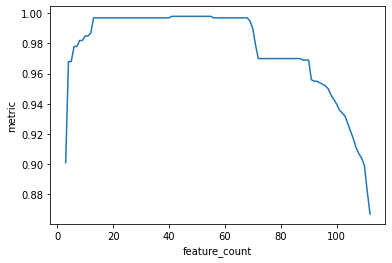

In [22]:
best_feature_list, metric_feature_df = pt.modelling.reduce_feature_space(
    setup=setup,
    algorithm="nb",
    metric="f1",
    reference_metric=compare_df_tune.iloc[0]["f1"],
    acceptable_loss=0.95,
)

In [27]:
compare_df_tune, model_list, opt_history_dict = pt.modelling.tune_hyperparams(
    setup=setup,
    include=["nb", "lr"],
    optimize="f1",
    n_trials=20,
    feature_list=best_feature_list,
    return_models=True,
)
compare_df_tune

[I 2022-12-14 11:10:03] %%% TUNING HYPERPARAMETERS
[I 2022-12-14 11:10:03] Algorithms: ['nb', 'lr']
[I 2022-12-14 11:10:03] Metric: f1
[I 2022-12-14 11:10:03] Trials per algorithm: 20
[I 2022-12-14 11:10:09] Trial 0 finished with value: 0.9923 and parameters: {'var_smoothing': 2.5246329076282813e-05}. Best is trial 0 with value: 0.9923
[I 2022-12-14 11:10:09] Trial 1 finished with value: 0.9975 and parameters: {'var_smoothing': 2.9168990894130266e-10}. Best is trial 1 with value: 0.9975
[I 2022-12-14 11:10:09] Trial 2 finished with value: 0.9969 and parameters: {'var_smoothing': 4.824001434640169e-11}. Best is trial 1 with value: 0.9975
[I 2022-12-14 11:10:09] Trial 3 finished with value: 0.9277 and parameters: {'var_smoothing': 0.8933273969050859}. Best is trial 1 with value: 0.9975
[I 2022-12-14 11:10:10] Trial 4 finished with value: 0.9874 and parameters: {'var_smoothing': 0.000400162606686326}. Best is trial 1 with value: 0.9975
[I 2022-12-14 11:10:10] Trial 5 finished with value: 

,algorithm,accuracy,precision,recall,f1,roc_auc,Fit time (s),hyperparams
0,lr,0.999,1.0,0.998,0.999,1.000,4.932,"{'C': 2.4870355289536046, 'class_weight': None..."
1,nb,0.998,1.0,0.995,0.998,0.999,0.063,"{'priors': None, 'var_smoothing': 2.9168990894..."
